# Credit Risk Analysis (Multi-class classification)

The aim of this project is not only to maximise the classification accuracy but to minimise the model complexity and achieve interpretable results to some extent and find a sweet spot with appropriate model complexity and performance.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import kruskal
import shap
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [2]:
r1=pd.read_excel("case_study1.xlsx")
r2=pd.read_excel("case_study2.xlsx")

## Developing Data understanding

In [3]:
print("The size of 1st dataset is:",r1.shape)
print("The size of 2nd dataset is:",r2.shape)

The size of 1st dataset is: (51336, 26)
The size of 2nd dataset is: (51336, 62)


In [4]:
r1.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
10312,10313,2,2,0,1,2,0.500,1.000,0.000,1.000,...,0,1,0,0,0,1,1,0,17,5
25237,25238,6,4,2,2,2,0.333,0.333,0.333,0.667,...,0,2,0,0,0,2,4,4,71,5
37778,37779,31,21,10,3,4,0.097,0.129,0.323,0.677,...,2,17,3,0,4,6,25,4,81,4
24736,24737,5,2,3,3,0,0.600,0.000,0.600,0.400,...,0,1,3,0,0,3,2,1,50,5
20082,20083,1,1,0,0,0,0.000,0.000,0.000,1.000,...,0,0,1,0,0,1,0,0,22,22


In [5]:
r2.sample(5)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
17142,17143,167,10,10,1,24,24,0,1,1,...,0.0,0.0,0.0,0.586,0,0,ConsumerLoan,ConsumerLoan,651,P4
8280,8281,48,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.795,0,0,ConsumerLoan,others,692,P2
41395,41396,611,31,31,1,1,1,0,0,0,...,0.0,0.5,0.0,1.543,0,0,PL,PL,643,P4
42983,42984,54,19,18,2,47,16,0,0,0,...,0.0,0.0,0.0,7.080,1,0,ConsumerLoan,others,702,P1
19127,19128,221,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,others,others,697,P2


In [6]:
r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [7]:
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [8]:
r1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,...,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,...,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,...,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,...,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


In [9]:
r2.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,...,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,...,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.000000
50%,25668.500000,70.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,680.000000
75%,38502.250000,161.000000,8.000000,3.000000,1.000000,15.000000,10.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.164250,1.000000,0.000000,691.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,173800.000000,1.000000,1.000000,811.000000


- Both the datasets have no NULL values, but from describe it is clear that -99999 is used instead of NULL value. So we will consider -99999 as NULL values.
- Let us count how many NULL values are there in each column of both dataset.

In [10]:
def count_neg_99999(df):
    # Create a dictionary to store the counts for each column
    neg_counts = {}
    
    # Loop through each column and count the occurrences of -99999
    for col in df.columns:
        count = (df[col] == -99999).sum()
        # Only add to the dictionary if the count is greater than 0
        if count > 0:
            neg_counts[col] = count
    
    # Convert the dictionary to a DataFrame for better visualization (optional)
    result_df = pd.DataFrame(list(neg_counts.items()), columns=['Column', '-99999 Count'])
    return result_df

In [11]:
count_neg_99999(r1)

,Column,-99999 Count
0,Age_Oldest_TL,40
1,Age_Newest_TL,40


In [12]:
count_neg_99999(r2)

,Column,-99999 Count
0,time_since_recent_payment,4291
1,time_since_first_deliquency,35949
2,time_since_recent_deliquency,35949
3,max_delinquency_level,35949
4,max_deliq_6mts,12890
5,max_deliq_12mts,10832
6,tot_enq,6321
7,CC_enq,6321
8,CC_enq_L6m,6321
9,CC_enq_L12m,6321


- In the 1st dataframe two columns `Age_Oldest_TL` and `Age_Newest_TL` have NULL values with a count of 40. We can either impute those values or just remove the 40 rows itself, we will try both approaches.
- In the 2nd dataframe some columns have more than 80% of values as NULL. In this case any imputation technique will not work efficiently, so we will drop those columns. The columns we are dropping for now are: `time_since_first_deliquency`,`time_since_recent_deliquency`,`max_delinquency_level`,`CC_utilization`,`PL_utilization`
- For the remaining columns we will try both imputation and dropping the rows approach.

In [13]:
# List of column names to drop
columns_to_drop = ['time_since_first_deliquency', 
                   'time_since_recent_deliquency', 
                   'max_delinquency_level', 
                   'CC_utilization', 
                   'PL_utilization']

# Drop the specified columns from the r2 dataframe
r2 = r2.drop(columns=columns_to_drop)
r2.sample(3)

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
22907,22908,64,0,0,0,0,0,0,0,0,...,1.0,0.0,1.0,24.114,0,0,CC,others,673,P2
49416,49417,1584,0,0,0,0,0,-99999,-99999,0,...,0.0,0.0,0.0,-99999.000,0,0,ConsumerLoan,AL,680,P2
13026,13027,2834,0,0,0,0,0,-99999,-99999,0,...,0.0,0.0,0.0,-99999.000,0,0,HL,others,686,P2


- Replace -99999 with NULL, for further processing.

In [14]:
r1.replace(-99999, np.nan, inplace=True)
r2.replace(-99999, np.nan, inplace=True)

- Let us first work on 1st dataset r1, so we have two numeric columns with 40 missing values. Since it is a numerical column I will apply Mean imputation technique but before applying that, let me check the distribution of the column.

In [15]:
# Ho: The distribution is Normal
# H1: The distribution is not Normal
def check_normality(df, columns):
    results = {}

    for column in columns:
        # Remove NULL values from the column
        clean_data = df[column].dropna()

        # Apply Kolmogorov-Smirnov test
        if len(clean_data) > 1:  # Check if there's enough data to perform the test
            statistic, p_value = stats.kstest(clean_data, 'norm')
            # Determine if the column is normally distributed based on the p-value
            is_normal = p_value > 0.05
            results[column] = is_normal
        else:
            results[column] = 'Not enough data after removing NULLs'

    return results

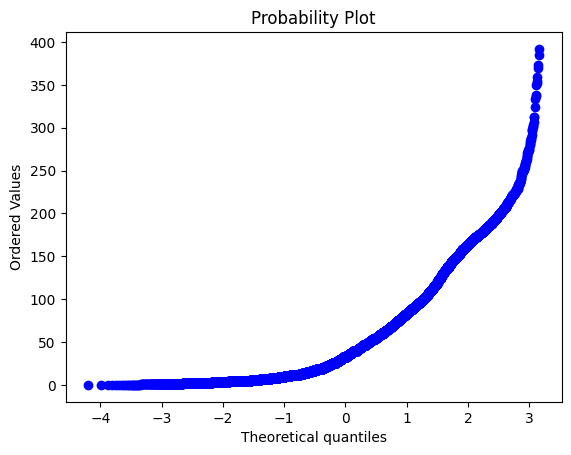

In [16]:
# Q-Q plot
stats.probplot(r1['Age_Oldest_TL'], dist="norm", plot=plt)
plt.show()

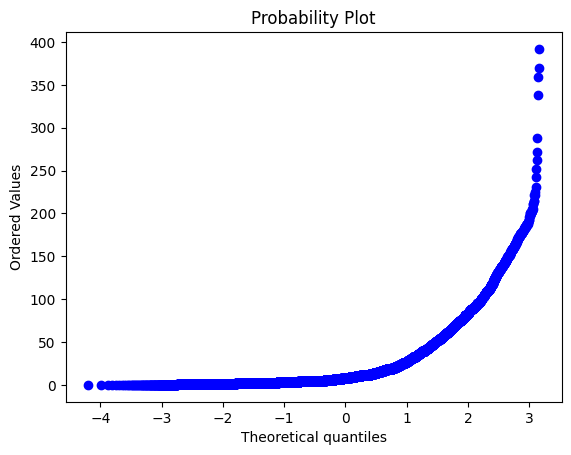

In [17]:
# Q-Q plot
stats.probplot(r1['Age_Newest_TL'], dist="norm", plot=plt)
plt.show()

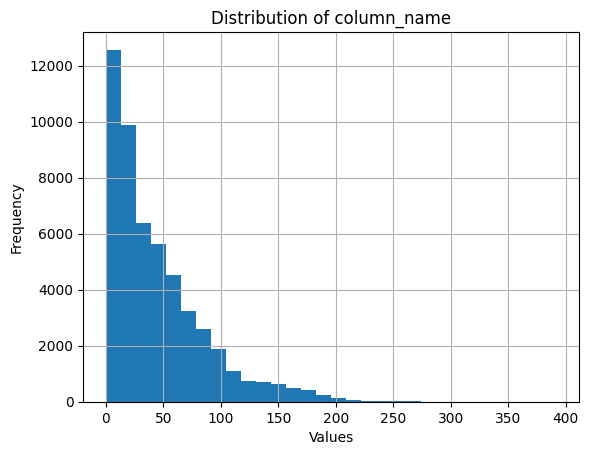

In [18]:
# Histogram Plot
r1['Age_Oldest_TL'].hist(bins=30)
plt.title('Distribution of column_name')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

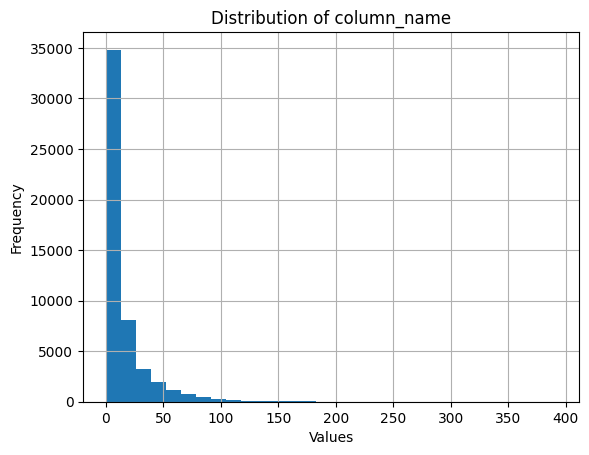

In [19]:
# Histogram Plot
r1['Age_Newest_TL'].hist(bins=30)
plt.title('Distribution of column_name')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [20]:
check_normality(r1,['Age_Oldest_TL','Age_Newest_TL'])

{'Age_Oldest_TL': False, 'Age_Newest_TL': False}

- From the above analysis it is clear that the columns `Age_Oldest_TL` and `Age_Newest_TL` are not normally distributed and from the graphs it is evident that data is right skewed. In this scenerio, we cannot apply mean imputation directly, we have to do certain transformations like Log, Square root, Box-Cox etc or we can change the imputation technique itself. Since missing values are very less, I am choosing to go forward with Median imputation since it is less affected by extreme values as compared to mean imputation.

In [21]:
median_value = r1['Age_Newest_TL'].median()
r1['Age_Newest_TL'] = r1['Age_Newest_TL'].fillna(median_value)

In [22]:
median_value = r1['Age_Oldest_TL'].median()
r1['Age_Oldest_TL'] = r1['Age_Oldest_TL'].fillna(median_value)

- Now, imputation for r1 dataset is done, lets go ahead with imputation in r2 dataset.

In [23]:
# Count the number of NULL values in each column
null_counts = r2.isnull().sum()

# Filter out columns with no NULL values and sort the counts in descending order
sorted_null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

# Display the result
print(sorted_null_counts)

max_unsec_exposure_inPct     23178
max_deliq_6mts               12890
max_deliq_12mts              10832
tot_enq                       6321
CC_enq                        6321
CC_enq_L6m                    6321
CC_enq_L12m                   6321
PL_enq                        6321
PL_enq_L6m                    6321
PL_enq_L12m                   6321
time_since_recent_enq         6321
enq_L12m                      6321
enq_L6m                       6321
enq_L3m                       6321
time_since_recent_payment     4291
pct_currentBal_all_TL           72
dtype: int64


- Before starting imputation, let us understand the importance of the above features with respect to target variable. Since all the above features are numeric and our target variable is multi-class categorical variable. We can apply ANOVA to check importance of each variable. But before applying ANOVA, we have to check for assumptions of ANOVA test.

In [24]:
column_names = [
    "max_unsec_exposure_inPct",
    "max_deliq_6mts",
    "max_deliq_12mts",
    "tot_enq",
    "CC_enq",
    "CC_enq_L6m",
    "CC_enq_L12m",
    "PL_enq",
    "PL_enq_L6m",
    "PL_enq_L12m",
    "time_since_recent_enq",
    "enq_L12m",
    "enq_L6m",
    "enq_L3m",
    "time_since_recent_payment",
    "pct_currentBal_all_TL"
]

In [25]:
check_normality(r2,column_names)

{'max_unsec_exposure_inPct': False,
 'max_deliq_6mts': False,
 'max_deliq_12mts': False,
 'tot_enq': False,
 'CC_enq': False,
 'CC_enq_L6m': False,
 'CC_enq_L12m': False,
 'PL_enq': False,
 'PL_enq_L6m': False,
 'PL_enq_L12m': False,
 'time_since_recent_enq': False,
 'enq_L12m': False,
 'enq_L6m': False,
 'enq_L3m': False,
 'time_since_recent_payment': False,
 'pct_currentBal_all_TL': False}

- It is evident from above analysis that none of the column is Normally distributed, so we cannot apply ANONA here. So we have to apply its non parametric alternative Kruskal-Wallis H Test.

In [26]:
'''The Kruskal-Wallis test can help determine whether there is a statistically significant difference in the distribution
of a numerical variable across different categories of the target variable. However, it doesn't directly answer the 
question of variable importance in the way that feature importance methods.

Null Hypothesis (H₀):
The medians of all the groups are equal.
𝐻0: The distributions of the groups are the same.

Alternative Hypothesis (H₁):
At least one group has a different median than the others.
𝐻1:At least one group’s distribution is different.
'''
def perform_kruskal_test(df, numerical_columns, target_column):
    kruskal_results = {}

    for col in numerical_columns:
        # Remove NULL values from the column
        clean_data = df[col].dropna()

        # Check if the target column and cleaned data have enough data to perform the test
        if not clean_data.empty and target_column in df.columns:
            # Group the data based on the target column
            groups = [clean_data[df[target_column] == category] for category in df[target_column].unique()]

            # Apply the Kruskal-Wallis H Test
            if all(len(group) > 0 for group in groups):  # Ensure each group has data
                stat, p_val = kruskal(*groups)
                kruskal_results[col] = p_val
            else:
                kruskal_results[col] = None  # Not enough data in one of the groups
        else:
            kruskal_results[col] = None  # Not enough data in the column

    return kruskal_results

In [27]:
perform_kruskal_test(r2,column_names,'Approved_Flag')

{'max_unsec_exposure_inPct': 1.8191716739396616e-175,
 'max_deliq_6mts': 1.834234986149143e-25,
 'max_deliq_12mts': 5.255018939625339e-98,
 'tot_enq': 0.0,
 'CC_enq': 7.928342029329014e-231,
 'CC_enq_L6m': 0.0,
 'CC_enq_L12m': 0.0,
 'PL_enq': 0.0,
 'PL_enq_L6m': 0.0,
 'PL_enq_L12m': 0.0,
 'time_since_recent_enq': 0.0,
 'enq_L12m': 0.0,
 'enq_L6m': 0.0,
 'enq_L3m': 0.0,
 'time_since_recent_payment': 5.407003495441621e-52,
 'pct_currentBal_all_TL': 3.982484429106521e-116}

In [28]:
from sklearn.impute import KNNImputer
# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed

# Apply KNN Imputer to the specified columns
r2[column_names] = imputer.fit_transform(r2[column_names])

In [29]:
r2.shape

(51336, 57)

- Let is combine both the dataset with the common column.

In [30]:
# Checking common column names
for i in list(r1.columns):
    if i in list(r2.columns):
        print (i)

PROSPECTID


In [31]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd.merge( r1, r2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [32]:
df.shape

(51336, 82)

In [33]:
df.sample(2)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
35931,35932,4,4,0,0,1,0.0,0.25,0.0,1.0,...,0.0,0.0,0.0,0.1714,0,0,others,others,692,P2
16910,16911,1,0,1,0,0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.6250,0,0,others,others,681,P2


- Let us check how many categorical columns do we have and try to check the association between the categorical variables and the target variable. Since our target variable is also categorical, we will apply Chi-Square test.


In [34]:
categorical_columns=[]
numeric_columns=[]
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_columns.append(i)
    else:
        numeric_columns.append(i)
print(categorical_columns)

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2', 'Approved_Flag']


All the assumptions of the Chi-Square test are satisfied for the analysis.

Test Hypotheses:
- Null Hypothesis (H0): There is no association between the two categorical variables.
- Alternative Hypothesis (H1): There is an association between the two categorical variables.

Assumptions of the Chi-Square Test:
1. **Level of Measurement**: Both variables should be categorical (nominal or ordinal).
2. **Independence of Observations**: Each observation should be independent of the others.
3. **Expected Frequency**: The expected frequency for each category should be at least 5.
4. **Sample Size**: A larger sample size is generally preferred, with a total sample size of at least 20 to 30 recommended.
5. **No Zero Counts**: Ideally, there should be no categories with zero counts in the contingency table.

Chi-Square Formula:
\[
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
\]
Where:
- \( O_i \) = Observed frequency in each category
- \( E_i \) = Expected frequency in each category


In [35]:
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2,p_val, dof,exp=chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i," ---> ",p_val)

MARITALSTATUS  --->  2.7588304433709322e-257
EDUCATION  --->  8.464676085080213e-38
GENDER  --->  0.00024506679895417084
last_prod_enq2  --->  0.0
first_prod_enq2  --->  0.0


- Since p-value for all the categorical variables < 0.05 , we will reject the null hypothesis. We will keep all the variables in the dataset since they have significant association with the target variable.

In [36]:
numeric_columns.pop(0)

'PROSPECTID'

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Sequential VIF is applied
def calculate_vif(data, threshold=9.0):
    variables = data.columns
    dropped = True
    
    while dropped:
        dropped = False
        vif = pd.DataFrame()
        vif["Variable"] = variables
        vif["VIF"] = [variance_inflation_factor(data[variables].values, i) for i in range(len(variables))]

        # Handle infinite VIF values
        if np.isinf(vif["VIF"]).any():
            infinite_var = vif.loc[vif["VIF"] == np.inf, "Variable"].iloc[0]
            print(f"Dropping '{infinite_var}' due to infinite VIF")
            variables = variables.drop(infinite_var)
            dropped = True
            continue

        # Check if the highest VIF value exceeds the threshold
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            dropped = True
            max_vif_var = vif.sort_values("VIF", ascending=False)["Variable"].iloc[0]
            print(f"Dropping '{max_vif_var}' with VIF: {max_vif}")
            variables = variables.drop(max_vif_var)

    return vif

# The VIF calculation
vif_result = calculate_vif(df[numeric_columns])
print(vif_result)


C:\Users\Deepanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'Total_TL' due to infinite VIF


C:\Users\Deepanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'Tot_Closed_TL' due to infinite VIF


C:\Users\Deepanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'pct_active_tl' due to infinite VIF


C:\Users\Deepanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'Auto_TL' due to infinite VIF


C:\Users\Deepanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'num_deliq_6mts' due to infinite VIF
Dropping 'pct_of_active_TLs_ever' with VIF: 2717.802656525999
Dropping 'Secured_TL' with VIF: 95.0932666498264
Dropping 'enq_L12m' with VIF: 36.75792226821694
Dropping 'Credit_Score' with VIF: 31.04925002940766
Dropping 'num_std_12mts' with VIF: 25.605531648333102
Dropping 'pct_PL_enq_L6m_of_L12m' with VIF: 24.797639642114646
Dropping 'Total_TL_opened_L12M' with VIF: 21.206099394813272
Dropping 'pct_CC_enq_L6m_of_L12m' with VIF: 19.781081772937792
Dropping 'Unsecured_TL' with VIF: 17.376259198993637
Dropping 'enq_L6m' with VIF: 16.948148519292243
Dropping 'num_times_30p_dpd' with VIF: 14.608719451468232
Dropping 'PL_enq_L12m' with VIF: 12.518897712894939
Dropping 'AGE' with VIF: 12.366900356146754
Dropping 'Tot_Active_TL' with VIF: 11.476184714676666
Dropping 'num_deliq_12mts' with VIF: 9.82854737618168
Dropping 'CC_enq_L12m' with VIF: 9.419119544293906
Dropping 'num_dbt_12mts' with VIF: 9.301293221452708
                      Variable     

In [38]:
a=len(list(vif_result['Variable']))
b=len(numeric_columns)
print(f"No of Numeric columns dropped after applying VIF on the dataset:{b-a}")

No of Numeric columns dropped after applying VIF on the dataset:22


#### The strict assumptions of logistic regression are:

- Binary Outcome Variable: The dependent variable must be binary (two outcomes).

- Independence of Observations: Observations must be independent of each other.

- Linearity of Logits: The relationship between the log-odds of the outcome and the independent variables must be linear.

- No Multicollinearity: Independent variables should not be highly correlated.

- Large Sample Size: A sufficient sample size is required to ensure reliable estimates, often at least 10 events per predictor.

- No Outliers: The model should not be unduly influenced by outliers.

- Adequate Sample Size for Each Outcome: There should be enough observations in each outcome category for stable estimates.

In [39]:
new_numeric_columns=list(vif_result['Variable'])

In [40]:
columns_to_be_kept=new_numeric_columns+categorical_columns

In [41]:
new_df = df[columns_to_be_kept]

### Let us Begin with model building

In [42]:
categorical_columns

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [43]:
print(new_df['MARITALSTATUS'].unique())
print(new_df['EDUCATION'].unique())
print(new_df['GENDER'].unique())
print(new_df['last_prod_enq2'].unique())
print(new_df['first_prod_enq2'].unique())

['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
['M' 'F']
['PL' 'ConsumerLoan' 'others' 'AL' 'CC' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [44]:
import pandas as pd

# Assuming df is your dataframe and 'EDUCATION' is the column
education_mapping = {
    'SSC': 1,
    '12TH': 2,
    'GRADUATE': 3,
    'UNDER GRADUATE': 3,
    'POST-GRADUATE': 4,
    'OTHERS': 1,
    'PROFESSIONAL': 3
}

# Use .loc to safely assign values to the 'Education_Encoded' column
new_df.loc[:, 'Education_Encoded'] = new_df['EDUCATION'].map(education_mapping)

# Check the updated dataframe
print(new_df[['EDUCATION', 'Education_Encoded']].head())



       EDUCATION  Education_Encoded
0           12TH                  2
1       GRADUATE                  3
2            SSC                  1
3            SSC                  1
4  POST-GRADUATE                  4


C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_18676\4100023945.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'Education_Encoded'] = new_df['EDUCATION'].map(education_mapping)


In [45]:
new_df = new_df.drop('EDUCATION', axis=1)

In [46]:
X = new_df.drop('Approved_Flag', axis =1)
y = new_df['Approved_Flag']

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical_features)
    ])



In [48]:
"""
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

'Logistic Regression': (LogisticRegression(max_iter=1000, solver='saga'), {  # Use 'saga' solver for elastic net
        'logistic_regression__C': [0.1, 1, 10, 20],
        'logistic_regression__penalty': ['elasticnet'],
        'logistic_regression__l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Tune the balance between L1 and L2

"""

"\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.ensemble import RandomForestClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import classification_report\nfrom sklearn.preprocessing import LabelEncoder\nimport pandas as pd\n\n# Encode target labels\nlabel_encoder = LabelEncoder()\ny_train_encoded = label_encoder.fit_transform(y_train)\ny_test_encoded = label_encoder.transform(y_test)\n\n'Logistic Regression': (LogisticRegression(max_iter=1000, solver='saga'), {  # Use 'saga' solver for elastic net\n        'logistic_regression__C': [0.1, 1, 10, 20],\n        'logistic_regression__penalty': ['elasticnet'],\n        'logistic_regression__l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Tune the balance between L1 and L2\n\n"

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define models and parameter grids
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'logistic_regression__C': [0.1, 1, 10,20],
        'logistic_regression__solver': ['lbfgs', 'newton-cg', 'sag']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'decision_tree__max_depth': list(range(1, 11)),
        'decision_tree__min_samples_split': [2, 5, 10]
    }),
    'SVM': (SVC(), {
        'svm__C': [0.1, 1, 10, 20],
        'svm__gamma': ['auto']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'random_forest__n_estimators': [50, 100, 200,300],
        'random_forest__max_depth':  list(range(5, 15)),
        'random_forest__min_samples_split': [5, 10]
    }),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss'), {
        'xgboost__n_estimators': [50, 100, 200],
        'xgboost__max_depth': [3, 5, 7],
        'xgboost__learning_rate': [0.01, 0.1, 0.2]
    })
}

# Initialize results storage
results = {}

# Train and tune models
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               (model_name.lower().replace(" ", "_"), model)])
    
    # Perform Grid Search
    grid_search = GridSearchCV(pipeline, params, cv=4, scoring='f1_macro', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train_encoded)  # Use encoded labels for training
    
    # Store the best model and its performance
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    y_pred = best_model.predict(X_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)  # Decode the predictions back to original labels
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Test F1 Score for {model_name}: {classification_report(y_test, y_pred_decoded)}")
    
    results[model_name] = {
        'best_model': best_model,
        'best_score': best_score,
        'classification_report': classification_report(y_test, y_pred_decoded, output_dict=True)
    }

# Results summary
results_summary = pd.DataFrame({
    'Model': results.keys(),
    'Best Score': [result['best_score'] for result in results.values()],
    'Test Classification Report': [result['classification_report'] for result in results.values()]
})


Training Logistic Regression...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters for Logistic Regression: {'logistic_regression__C': 20, 'logistic_regression__solver': 'sag'}
Test F1 Score for Logistic Regression:               precision    recall  f1-score   support

          P1       0.80      0.67      0.73      1135
          P2       0.77      0.94      0.85      6379
          P3       0.44      0.11      0.18      1536
          P4       0.71      0.63      0.67      1218

    accuracy                           0.75     10268
   macro avg       0.68      0.59      0.61     10268
weighted avg       0.72      0.75      0.71     10268

Training Decision Tree...
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best parameters for Decision Tree: {'decision_tree__max_depth': 9, 'decision_tree__min_samples_split': 10}
Test F1 Score for Decision Tree:               precision    recall  f1-score   support

          P1       0.76      0.71      0

In [50]:

education_mapping = {
    'SSC': 1,
    '12TH': 2,
    'GRADUATE': 3,
    'UNDER GRADUATE': 3,
    'POST-GRADUATE': 4,
    'OTHERS': 1,
    'PROFESSIONAL': 3
}

# Use .loc to safely assign values to the 'Education_Encoded' column
df.loc[:, 'Education_Encoded'] = df['EDUCATION'].map(education_mapping)
df = df.drop('EDUCATION', axis =1)

# Split the data into training and testing sets
X_full = df.drop('Approved_Flag', axis =1)
y_full = df['Approved_Flag']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features_full = X_full.select_dtypes(include=['int64', 'float64']).columns
categorical_features_full = X_full.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor_full = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_full),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical_features_full)
    ])

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_full)
y_test_encoded = label_encoder.transform(y_test_full)

In [51]:
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, solver='saga'), {  # Use 'saga' solver for elastic net
        'logistic_regression__C': [0.1, 1, 10, 20],
        'logistic_regression__penalty': ['elasticnet'],
        'logistic_regression__l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Tune the balance between L1 and L2
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'decision_tree__max_depth': list(range(1, 11)),
        'decision_tree__min_samples_split': [5, 10, 15]
    }),
    'SVM': (SVC(), {
        'svm__C': [0.1, 1, 10, 20],
        'svm__gamma': ['auto']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'random_forest__n_estimators': [50, 100, 200, 300],
        'random_forest__max_depth': list(range(5, 15)),
        'random_forest__min_samples_split': [5, 10]
    }),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss'), {
        'xgboost__n_estimators': [50, 100, 200],
        'xgboost__max_depth': [3, 5, 7],
        'xgboost__learning_rate': [0.01, 0.1, 0.2]
    })
}
# Initialize results storage
results = {}

# Train and tune models
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    # Create a pipeline
    pipeline_full = Pipeline(steps=[('preprocessor_full', preprocessor_full),
                               (model_name.lower().replace(" ", "_"), model)])
    
    # Perform Grid Search
    grid_search = GridSearchCV(pipeline_full, params, cv=4, scoring='f1_macro', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_full, y_train_encoded)  # Use encoded labels for training
    
    # Store the best model and its performance
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    y_pred_full = best_model.predict(X_test_full)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_full)  # Decode the predictions back to original labels
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Test F1 Score for {model_name}: {classification_report(y_test_full, y_pred_decoded)}")
    
    results[model_name] = {
        'best_model': best_model,
        'best_score': best_score,
        'classification_report': classification_report(y_test_full, y_pred_decoded, output_dict=True)
    }

# Results summary
results_summary = pd.DataFrame({
    'Model': results.keys(),
    'Best Score': [result['best_score'] for result in results.values()],
    'Test Classification Report': [result['classification_report'] for result in results.values()]
})


Training Logistic Regression...
Fitting 4 folds for each of 16 candidates, totalling 64 fits


C:\Users\Deepanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for Logistic Regression: {'logistic_regression__C': 0.1, 'logistic_regression__l1_ratio': 0.9, 'logistic_regression__penalty': 'elasticnet'}
Test F1 Score for Logistic Regression:               precision    recall  f1-score   support

          P1       0.98      0.93      0.96      1135
          P2       0.93      0.99      0.96      6379
          P3       0.92      0.72      0.81      1536
          P4       0.97      0.96      0.96      1218

    accuracy                           0.94     10268
   macro avg       0.95      0.90      0.92     10268
weighted avg       0.94      0.94      0.94     10268

Training Decision Tree...
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best parameters for Decision Tree: {'decision_tree__max_depth': 7, 'decision_tree__min_samples_split': 15}
Test F1 Score for Decision Tree:               precision    recall  f1-score   support

          P1       1.00      1.00      1.00      1135
          P2       1.00      1.0